<a href="https://colab.research.google.com/github/Coyote-Schmoyote/sentiment-analysis-ml/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis 
This notebook looks into an Natural Language Processing (NLP) task called "Sentiment Analysis". Sentiment Analysis, also called "opinion mining" helps to determine whether the opinions behind a certain text data is positive, neutral, or negative. Sentiment analysis is often used by businesses to detect the general feeling in social data, such as comments, reviews, social media posts, etc., to understand customers and gradp brand reputation.

  <img src="https://drive.google.com/uc?id=1NRIa_K_UeyPOdEZvbHtF6zsZTCzFMqUN" align="right" alt="img"/>


## 1. Problem Definition
In this project, we will conduct a sentiment analysis based on movie reviews from IMDB. We will build a machine learning model that will detect wether a review is positive or negative.

## 2. Data
We will use the IMDB Dataset of 50K Movie Reviews (https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) that consists of 50,000 lebeled reviews, 25,000 positive and 25,000 negative.

## 3. Approach
First, we will conduct an Exploratory Data Analysis (EDA), and the proceed to data preprocessing. In NLP, we need to clean and prepare the data, tokenize and lemmatize it, and then convert to numbers. Finally, we will choose a machine learning algorithm and fit it to the data.

## 4. Evaluation
Since sentiment analysis is a classification problem, it uses Precision, Recall, F-score, and Accuracy as its evaluation metric. Generally, when evaluating sentiments, we try to meet 80-85% in Accuracy.

#Machine Learning

## Import tools

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

## EDA
First, we need to get acquianted with our data. Let's load it as a `pandas` dataframe and explore it.


In [2]:
data = pd.read_csv("/content/drive/MyDrive/ml-projects/nlp-sentiment-analysis/IMDB_Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data.shape

(50000, 2)

In [7]:
data.dtypes

review       object
sentiment    object
dtype: object

So, we can see that the data consists of 2 types of data: reviews and sentiments. The `review` columns includes the actual movie reviews made by the users, and the `sentiment` column reveals wether the review was positive or negative. Essentially, `review` column consists the feautresm and `sentiment` column consists the target varibales, or labels for our data. 

There are no missing values, and the total number of reviews is 50,000.

### Data visualization
Now let's visualize our data. There are many different ways we can decide to visualize our data, but for now let's visualize it in 2 ways:
1. Plot the sentiment value distribution (how many poisitive and how many negative reviews there are)
2. Display a sample review

positive    25000
negative    25000
Name: sentiment, dtype: int64


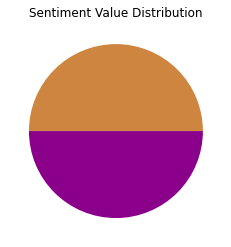

In [8]:
sentiments = data["sentiment"].value_counts()

fig, ax = plt.subplots()
ax.pie(sentiments, colors = ["peru", "darkmagenta"])
ax.set(title="Sentiment Value Distribution");

print(sentiments)

### NLP and RAM memory
NLP tasks tend to be extremely computationally expensive and require a lot of RAM memory. The longer the length of the sentence, the more memory and processing power is needed for NLP tasks. That's why so much attention is given to correct data pre-processing and reduction of the text data. Moreover, certain word vectorization practices, such as One-Hot Encoding, produce sparse vectors which end up occupying a considerable amount of memory. 

Keeping this in mind, we will take only first 10,000 reviews as our working data in the attempt to not overwhelm the Google Colab's RAM. 

In [9]:
data = data[:10000]

In [10]:
data.shape

(10000, 2)

## Data Preprocessing
One of the most critical parts of creating NLP projects is the proper preprocessing of text data and converting it into a machine-understandable format. The exact word preprocessing strategy may vary from project to project, but the overall workflow is quite similar.
First, we need to clean up our data by removing punctuation (!,? () *), URL, emoji, etc. After we are done cleaning our data, we need to lowercase all the words, and remove the stop words. 

In order to understand the process better, let's first conduct all the steps with our sample review.

In [11]:
sample_review = data.review[0]

In [12]:
sample_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

#### Clean HTML Tags
In our sample review, we could see some html tags, such as `<br>`. HTML tags, or URLs are not a part of speech, and therefore should be removed from the text. We can achieve that by using a Python library called `Beautiful Soup`. This library allows us to parse and scrape HTML and XML pages. In other words, we can search, navigate, and modify the data.

We will use the function `get_text()` to extract all the text without the HTML tags.


In [13]:
sample_review = BeautifulSoup(sample_review).get_text()
sample_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Clean punctuation and numbers
THe next step is to clean all the unnecessary symbols using Regular Expression Operations, commonly referred to as `regex`. We imported it in `re` module. **Regular Expresiion** is a sequence of characters that specifies a search pattern in a text. For example, a regex `colou?r` matches a string that contains `color` or `colour`. A regex `b[aeiou]bble` matches a string that contains `babble`, `bebble`, `bibble`, `bobble`, or `bubble`. 

In our case, we will use the `re.sub()` function of the module, which replaces matches with a string that we will specify. We will ask the function to replace all punctuation and numbers `[^a-zA-Z]` with an empty space `" "`.

In [14]:
sample_review = re.sub("[^a-zA-Z]", " ", sample_review)
sample_review

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Lowercase
The next step is to convert all our words to lowercase. It is recommended to convert the text to lowercase to ease the preprocessing. If the text is not lowercased, the model might treat the word that begins with a capital letter as a different word from the same word that appears in the text but without a capital letter. However, the decision to lowercase or not to lowercase might depend on the project and on the language. For example, most models in English would benefit from converting the text to lowercase. In German, however, capital letters have gramamtical significance, and therefore might not benefit from turning the text into lowercase. In Japanese, there is no need to lowercase the text, because there are no capital letters. 

In [15]:
sample_review = sample_review.lower()
sample_review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

### Remove stop words
Stop words are the most common words in a language, such as articles, prepositions, pronouns, conjuctions, but they don't add much information. For example, in English, some of the stop words are "the", "a", "so", "what." By removing these words, we are removing the low-level information from out text to give priority to the more important information. Also, removing the stopwords significantly reduces the dataset size, and, consequently, reduces the training time of our model.

In some tasks, such as sentiment analysis, the removal of stop words is not recommended, because a crucial part of information can be lost, resulting in a different meaning. For example, if we have a movie review that says “The movie was not good at all,” after removing stop words, we will get “movie good,” which is the opposite meaning of the original comment. Other tasks, such as classification and clustering, for example, do not need the stop words for proper analysis and therefore can be safely removed. In our case, we conduct a supervised sentiment analysis classification task, and therefore can try removing stop words as a part of our data pre-processing step.


There are many libraries that consist of the stopwords in different languages. For English language stopwords, we can use the `nltk` library.

### NLTK 
Natural Language Processing Kit (NLTK) is a platform for building Python programs that work with text data. It provides a number of tools for text processing, such as classification, tokenization, stemming, tagging, parsing, etc.

In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
words = set(stopwords.words("english"))
sample_review = [word for word in sample_review.split() if word not in words]
sample_review[:10]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened']

### Stemming and Lemmatization
#### Stemming
For languages like English, after tokenization, the next step in NLP preprocessing pipeline is usually stemming. Stemming is a technique that reduces the words to their root forms. For example, a word "beautifully" can ber stemmed to "beautiful". There are different types of stemming algorithms available in Python‘s NLTK: Porter Stemmer, Snowball Stemmer, Lancaster Stemmer, and Regexp Stemmer, with Porter Stemmer being the most common for the English language. 
#### Lemamtization
Lemmatization is an alternative method of shrinking the vocabulary. Unlike stemming, lemmatization depends on correctly identifying the intended part of speech and the meaning of a word in a sentence. Stemming algorithms work by cutting off the ending or the beginning of a word by taking into account a list of common prefixes and suffixes. Lemmatization, on the other hand, takes into consideration the morphological analysis of the word and bases the decisions on detailed dictionaries. 

#### Which one to choose?
While lemmatization produces more accurate and linguistically-correct results, stemming algorithm is easier, faster, and doesn't require a profound knowledge of linguistics, which often makes it the more popular choice for NLP tasks.



In [18]:
stemmer = nltk.porter.PorterStemmer()

In [19]:
sample_review = " ".join([stemmer.stem(word) for word in sample_review])

In [20]:
sample_review

'one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

### Tokenization
After cleaning the data, the next step for most NLP projects is tokenization. Tokenization refers to dividing text into appropriate units. The tool that performs the division of the text is called a tokenizer, and the sentence components resulting from the segmentation are called tokens. In other words, tokenization is a way to break text into smaller segments (tokens). We can break the text into characters, words, or partial words (n-gram). 

In languages like English, the most common way of forming tokens is based on spaces between the words. For example, in the sentence “This is an apple,” the most common way to tokenize this sentence would be by splitting each word and assigning an ID to each token. This - 0, is - 1, an - 2, apple - 3. Alternatively, we can tokenize text by characters, for example, in the word “singing”, character tokens would be s-i-n-g-i-n-g, or by subwords: sing-ing.


There are specialized libraries that can tokenize the text, such as `nltk`, `treebank word tokenizer`, `tweet tokenizer`, `MWET tokenizer`, and `TextBlob`.


The simplest way to tokenize text in English, however, is to use whitespace within a string as the "separator" of the words. This can be accomplished by simply using Python's `split()` function.


In [21]:
sample_review = sample_review.split()

In [22]:
sample_review

['one',
 'review',
 'mention',
 'watch',
 'oz',
 'episod',
 'hook',
 'right',
 'exactli',
 'happen',
 'first',
 'thing',
 'struck',
 'oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardcor',
 'classic',
 'use',
 'word',
 'call',
 'oz',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'em',
 'citi',
 'home',
 'mani',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'dare',
 'forget',
 'pretti',
 'pictur',
 'paint',
 'mainstream',
 '

### Visualize text data
This is an optional step, but can be implemented for better data visualization. `wordcloud` allows us to plot an image with the most common words in the reviews. First, let's plot a figure with the most common words in all the positive reviews, and then, let's plot a figure with the most common words in. all the negative reviews, so we can visually compare them.

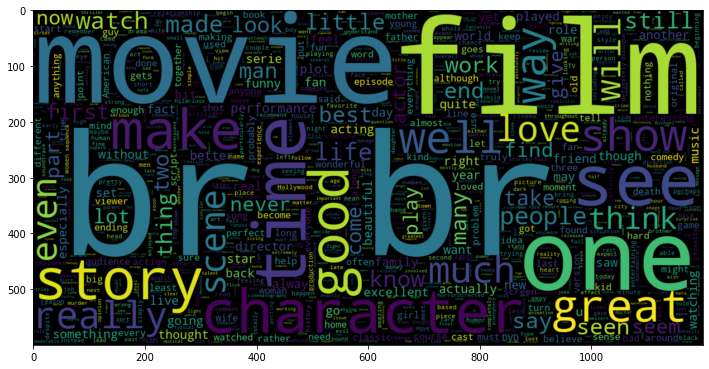

In [23]:
from wordcloud import WordCloud

plt.figure(figsize = (12,12)) # Positive Review Text
wc = WordCloud(max_words = 1000, 
               width = 1200 , 
               height = 600).generate(" ".join(data[data.sentiment == "positive"].review))
plt.imshow(wc , interpolation = 'bilinear');

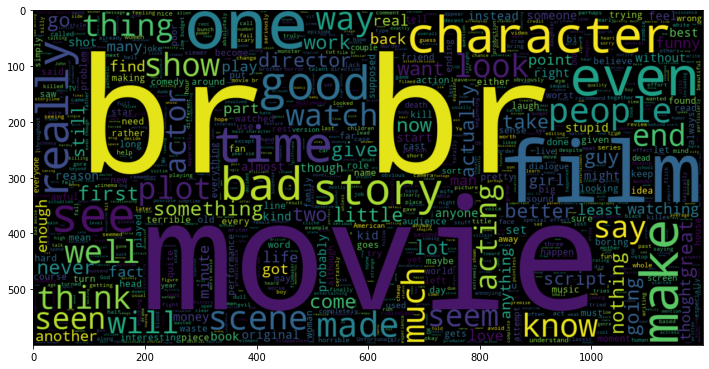

In [24]:
plt.figure(figsize = (12,12)) 
wc = WordCloud(max_words = 1000 , 
               width = 1200 , 
               height = 600).generate(" ".join(data[data.sentiment == "negative"].review))
plt.imshow(wc , interpolation = 'bilinear');

Now that we understand what each step does, let's combine it into one function, and apply it to all of our reviews.

In [25]:
def clean(reviews):
  reviews = BeautifulSoup(reviews).get_text()
  reviews = re.sub("[^a-zA-Z]", " ", reviews)
  reviews = reviews.lower()
  reviews = reviews.split()
  stop_words = set(stopwords.words("english"))
  reviews = [word for word in reviews if word not in stop_words]
  #join splitted words with space
  return(" ".join(reviews))


In [26]:
reviews = []
for i in range(len(data["review"])):        
    reviews.append(clean(data["review"][i]))

In [27]:
reviews[1]

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done'

### Data encoding
#### Word vectorization
Word vectorization, also referred to as "word embedding" is a process of bridging the gap between how humans understand language, and how machines understand language. It is a way of representing words and sentences in a numerical way. There are many ways to perform vectorization, ranging from simple binary term occurrence, like in One-Hot Encoding, to advanced content-aware feature representations, like Word2Vec. There are many options in between, like Bag of Words, TF-IDF, CBOW, GloVe, or Fast Text.

#### One-Hot Encoding
One-hot encoding (also referred to as localist representation) is the simplest method of word vectorization. Each word or token in a text corresponds to a vector element. 
For example, if we have a sentence “The apple is tasty,” the vector size of the sentence would be 4 because there are 5 elements (counting from 0), and each word in a vector would be represented with either 0 or 1, depending on whether it is activated or not. So, if we wanted to activate the word "tasty", our vector representation would look like 0, 0, 0, 1, 0.
The result of a one-hot encoding process is a matrix. The longer the text, the larger the matrix and more zeros, which ends up taking up a large amount of memory to store those non-activated word representations. A matrix with many zeros is called a 'sparse matrix'.

#### Count Vectorization
Count vectorization is a type of One-Hot Encoding. Count Vectorizer creates vectors with the number of dimensions equal to the size of our vocabulary. If the text data features that word, it will be put in one dimension. Every time that same word is encountered again, it will increase the count. Where the algorithm didn't find any words even once, it will leave a 0. As a result, we will have asparse matrix of 0 and 1, in which 1 would mean that the word appeared in the text at least once. 
In this example, we will use Count Vectorization to embed our words.



In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(sample_review)

CountVectorizer()

In [29]:
print("Vocabulary:")
print(vectorizer.vocabulary_)

Vocabulary:
{'one': 82, 'review': 96, 'mention': 74, 'watch': 129, 'oz': 85, 'episod': 30, 'hook': 57, 'right': 97, 'exactli': 32, 'happen': 52, 'first': 39, 'thing': 119, 'struck': 115, 'brutal': 10, 'unflinch': 125, 'scene': 101, 'violenc': 128, 'set': 105, 'word': 131, 'go': 47, 'trust': 122, 'show': 108, 'faint': 37, 'heart': 54, 'timid': 120, 'pull': 92, 'punch': 93, 'regard': 95, 'drug': 26, 'sex': 106, 'hardcor': 53, 'classic': 17, 'use': 126, 'call': 11, 'nicknam': 81, 'given': 45, 'oswald': 84, 'maximum': 72, 'secur': 104, 'state': 113, 'penitentari': 87, 'focus': 40, 'mainli': 68, 'emerald': 29, 'citi': 15, 'experiment': 34, 'section': 103, 'prison': 90, 'cell': 12, 'glass': 46, 'front': 42, 'face': 35, 'inward': 60, 'privaci': 91, 'high': 55, 'agenda': 1, 'em': 28, 'home': 56, 'mani': 70, 'aryan': 5, 'muslim': 77, 'gangsta': 43, 'latino': 65, 'christian': 14, 'italian': 62, 'irish': 61, 'scuffl': 102, 'death': 23, 'stare': 112, 'dodgi': 25, 'deal': 22, 'shadi': 107, 'agreeme

In [30]:
vector = vectorizer.transform(sample_review)

print("Full Vector:")
print(vector.toarray())

Full Vector:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Train-test split

Now that we know how one-hot-encoding-based word vectorization works, let's split our data to train and test sets. It is recommended to do word vectorization after splitting the data to guarantee that the model will not see test data on the training fase. In other words, it prevents test data from leaking into the training dataset.

### Encode the labels
Before splitting our data, let's do one last thing and convert the `sentiment` column, our target variable, to a numeric form, so that a positive review would be marked as `1`, and a negative review as `0`. 
To achieve this, we can use the `preprocessing.LabelEncoder()` from `sklearn` library.

Then, to split our data, we will use our familiar `train_test_split`.

In [31]:
labels = data["sentiment"].values

encoder = sklearn.preprocessing.LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [32]:
encoded_labels[:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [33]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(reviews, encoded_labels, 
                                                                            stratify = encoded_labels, 
                                                                            test_size = 0.2, 
                                                                            random_state=11)

### Vectorize all the reviews 
After we split our data, we can now vectorize our train and test reviews. We will use the same `CountVectorizer()` that we used for our sample review, but with one difference. We will specify that we want our output `dtype` to be `np.int16`, and not the deafult `np.int64`.

#### Integer types representation

As we know, there 4 types of integers: `int8`, `int16`, `int32`, `int64`. THe number after the `int` refers to the number of bits of memory required to store a value. So, `int8` uses 8 bits, and `int64` uses 64 bits. This implies that `int16` uses twice as much memory as `int8` does.

This is due to the differences in the range that these datatypes can keep. For example, `int8` is an 8-bit integer whose values exist on the interval `[-128, +127]`, `int16` is a 16-bit integer whose values exist on interval `[-32,767, +32, 767]`, `int32` occupies 32-bits, and its values exist on the interval `[-2,147,483,647, +2,147,483,647]`, and `int64` is a 64-bit integer whose values exist on the interval `[-9,223,372,036,854,755,807, +9,223,372,036,854,755,807]`. 

As we already discussed, NLP tasks tend to be memory-intensive, and many preprocessing steps are focused on reducing the required memory space. By changing `CountVectorizer`'s datatype from `int64` to `int16`, we are essentially doing the same, and storing all the information in less bits to save memory space. Depending on the server adn available RAM memory, if we skip these memory optimization steps, the algorithm calculations can overload the memory and the session will crash.



In [34]:
vectorizer = CountVectorizer(dtype=np.int16)

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [35]:
x_train[0]

<1x47038 sparse matrix of type '<class 'numpy.int16'>'
	with 63 stored elements in Compressed Sparse Row format>

In [36]:
#check the label array
y_train[:5]

array([1, 1, 1, 0, 0])

Typically, machine learning models require arrays of data, so we need to convert our `x_train` sparse matrix to an array using a simple `toarray()` function.

In [37]:
x_train = x_train.toarray()

In [38]:
#check the review array
x_train[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [39]:
#check the shapes of reviews and labels from the training dataset
x_train.shape[0], y_train.shape[0]

(8000, 8000)

Let's convert the reviews from the test dataset to an array as well.

In [40]:
x_test = x_test.toarray()

In [42]:
# check the shapes of reviews and labels from the testing dataset
x_test.shape[0], y_test.shape[0]

(2000, 2000)

### Fit and evaluate the model
Now we are ready to choose and evaluate a machine learning model for our task. Typically, sentiment analysis problems are framed as text classification problems. They might be binary (for example, is this review positive or negative?) or multiclass (does this tweet sound happy, angry, sad, or funny?) classification. In our case, we have a binary classification problem, and therefore we will try the algorithms used for classification problems: Logistic Regression and Random Forest Classifier. 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

In [44]:
models = []

models.append(("Logistic Regression", LogisticRegression()))
models.append(("Random Forest Classifier", RandomForestClassifier()))

In [46]:
for name, model in models:

    %time model.fit(x_train, y_train)
    test_pred = model.predict(x_test)
    print(name ,'Accuracy Score : ',accuracy_score(y_test, test_pred))
    print(name ,'F1 Score : ',f1_score(y_test, test_pred, average='weighted'))
    print('-----------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 1min 55s, sys: 7.17 s, total: 2min 2s
Wall time: 1min 12s
Logistic Regression Accuracy Score :  0.851
Logistic Regression F1 Score :  0.8509582633053221
-----------------------------------------------------------------------
CPU times: user 1min 43s, sys: 559 ms, total: 1min 43s
Wall time: 1min 43s
Random Forest Classifier Accuracy Score :  0.8275
Random Forest Classifier F1 Score :  0.827501164398579
-----------------------------------------------------------------------


### Conclusion
Our simple baseline model reached a pretty good score on the first try: Logistic Regression got an accuracy score of 85%, and Random Forest Classifier got an accuracy score of roughly 83%. We can use this as a baseline and further improve our model by incresing the amount of reviews, or by tweaking the hyperparameters.

# Deep Learning
The same task of movie review sentiment analysis can also be done using a deep learning model. In this section, we will demonstrate how to conduct sentiment analysis using the same **IMDB Movie Reviews** data for training a Recurrent Neural Network (RNN).

### Import tools

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [2]:
tf.__version__

'2.8.2'

### Tensorflow built-in IMDB dataset
Tensorflow has a number of built-in datasets in `tf.data.Datasets` format that a ready to use for deep learning projects. 
These built-in datasets are available through `TFDS` library, a high-level wrapper built around `tf.data` API.

> List of all available datasets in TFDS: https://www.tensorflow.org/datasets/catalog/overview

We will import the prepared dataset using `tfds.load()` function, and split it into reain and test datasets.

In [3]:
dataset, info = tfds.load("imdb_reviews", with_info = True,
                          as_supervised=True)

train_dataset, test_dataset = dataset["train"], dataset["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6B0D46/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6B0D46/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6B0D46/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
dataset

{Split('train'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [4]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Tensors

### TensorFlow Datasets
We can see that the loaded dataset is a `PrefetchDataset`, which consists of 2 `TensorSpec` elements: `train` split and `test` split.
* `PrefetchDataset`is a class that creates a dataset that asynchronouly prefetches elements from the input dataset. 


In [6]:
for text, label in train_dataset.take(1):
  print("label: ", label.numpy())
  print("text: ", text.numpy())

label:  0
text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."


### Creating train and test datasets
Now let's transform our train and test datasets. To do so, we need to:
1. Shuffle our out training dataset using `shuffle.()`
2. Specify the `batch_size`
3. Prefetch the data

#### Prefetch
`prefetch()` function is used to produce a dataset that prefetches the specified elements from a given dataset. In other words, `prefetch` grabs each dataset item in advance while the previous one is being processed. The idea behind this is that this way we can take advantage of the unused CPU power, while GPU is processing a batch during the training.
We can specifiy manually how many batches we want to prefetch using the function by putting it as a parameter. 

For example, if we want to prefetch one batch at a time, we can specify it as `prefetch(1)`. Alternarively, we can use `tf.data.AUTOTUNE`, which runs an optimization algorithm that automatically finds the best allocation of its CPU budget.

> Prefetching reduces the step time of the training time and the time it takes to extract the data. The number of elements to prefetch should be equal to or greater than the number of batches consumed by a single training.


In [7]:
buffer_size = 10000
batch_size = 32

In [8]:
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

### Display random samples


In [8]:
for text, label in train_dataset.take(1):
  print('labels: ', label.numpy()[:3])
  print()
  print('texts: ', text.numpy()[:3])


labels:  [1 0 0]

texts:  [b"THE ODD COUPLE is the classic film version of Neil Simon's most famous play about a TV newswriter named Felix Unger, who is an obsessive neat freak, who moves in with his divorced best friend, Oscar Madison, a sportswriter and complete slob, after his wife Frances throws him out of their apartment. Already divorced, Oscar takes his best friend in and regrets it from the moment he does it. Neil Simon's classic comedy first came to Broadway with Art Carney playing Felix and Walter Matthau playing Oscar. Jack Lemmon takes over for Carney in the film version with a memorable performance as Felix Unger. Lemmon is not only terribly funny in the role but so vividly real that he brings an element of melancholy to the pitiful figure that is Felix Unger. Matthau, fortunately, was allowed to recreate his role as Oscar, a one-of-a-kind gem of comic performance that provides consistent laughs throughout. This teaming of Lemmon and Matthau turned out to be comic gold tha

### Create the text encoder
The raw text that we loaded using `TFDS` has to be processed and vectorized before we can use it. The easiest way to vectorize text is by using a `TextVectorization` layer to our neural network.

#### Vocabulary

In [9]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [10]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [11]:
encoded_example = encoder(text)[:3].numpy()
encoded_example

array([[  2,   1, 365, ...,   0,   0,   0],
       [ 30, 264,   6, ...,   0,   0,   0],
       [  4, 579,   5, ...,   0,   0,   0]])

In [12]:
for i in range(3):
  print("Original: ", text[i].numpy())
  print("After de-coding: ", " ".join(vocab[encoded_example[i]]))
  print()

Original:  b"THE ODD COUPLE is the classic film version of Neil Simon's most famous play about a TV newswriter named Felix Unger, who is an obsessive neat freak, who moves in with his divorced best friend, Oscar Madison, a sportswriter and complete slob, after his wife Frances throws him out of their apartment. Already divorced, Oscar takes his best friend in and regrets it from the moment he does it. Neil Simon's classic comedy first came to Broadway with Art Carney playing Felix and Walter Matthau playing Oscar. Jack Lemmon takes over for Carney in the film version with a memorable performance as Felix Unger. Lemmon is not only terribly funny in the role but so vividly real that he brings an element of melancholy to the pitiful figure that is Felix Unger. Matthau, fortunately, was allowed to recreate his role as Oscar, a one-of-a-kind gem of comic performance that provides consistent laughs throughout. This teaming of Lemmon and Matthau turned out to be comic gold that was re-visited

### Create the model

In [13]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [14]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 66s 69ms/step - loss: 0.5936 - accuracy: 0.6226 - val_loss: 0.5094 - val_accuracy: 0.7396
Epoch 2/10
782/782 [==============================] - 50s 64ms/step - loss: 0.3858 - accuracy: 0.8264 - val_loss: 0.3673 - val_accuracy: 0.8479
Epoch 3/10
782/782 [==============================] - 51s 65ms/step - loss: 0.3353 - accuracy: 0.8556 - val_loss: 0.3603 - val_accuracy: 0.8635
Epoch 4/10
782/782 [==============================] - 50s 64ms/step - loss: 0.3183 - accuracy: 0.8638 - val_loss: 0.3480 - val_accuracy: 0.8469
Epoch 5/10
782/782 [==============================] - 50s 64ms/step - loss: 0.3105 - accuracy: 0.8681 - val_loss: 0.3458 - val_accuracy: 0.8375
Epoch 6/10
782/782 [==============================] - 51s 65ms/step - loss: 0.3045 - accuracy: 0.8706 - val_loss: 0.3388 - val_accuracy: 0.8667
Epoch 7/10
782/782 [==============================] - 51s 65ms/step - loss: 0.3024 - accuracy: 0.8701 - val_loss: 0.3335 - val_accuracy:

In [17]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.6086179673671722)

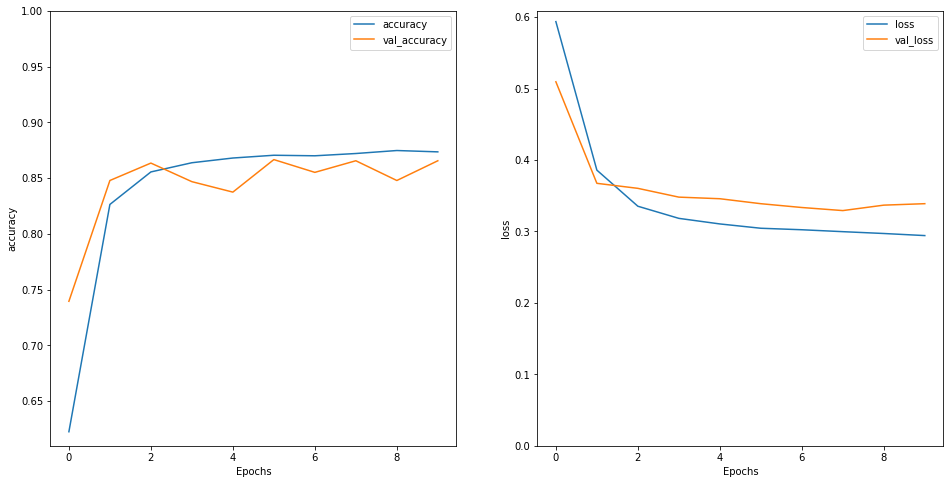

In [18]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [19]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

In [20]:
predictions

array([[0.71333706]], dtype=float32)